<a href="https://colab.research.google.com/github/guupiii/ESAA/blob/main/ESAA_YB3_%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 한글 폰트 설정
# 나눔 바른 고딕 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum -qq
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib
import matplotlib.pyplot as plt # Add this line
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
print("한글 폰트 설정 완료")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126435 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # Add this line
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train=pd.read_csv('/content/drive/MyDrive/MLData/movies_train.csv')

In [5]:
# dir_prev_dfnum이 na인 걸 0으로 바꾸기.
train.dir_prev_bfnum.fillna(0,inplace=True)
train.dir_prev_bfnum.isna().sum() # na 없음.

np.int64(0)

In [6]:
train.release_time=pd.to_datetime(train.release_time)
train.release_time.head(5)

,release_time
0,2012-11-22
1,2015-11-19
2,2013-06-05
3,2012-07-12
4,2010-11-04


상영 시간과 박스오피스 수의 관계 : 사람들이 선호하는 상영시간이 있을까?

스태프 수와 박스오피스 수의 관계 : 스태프의 수가 흥행에 영향을 줄까?

상영 등급과 장르 : 상영 등급에 따른 장르의 차이가 있을까?

이전 영화 수와 장르의 관계 : 감독의 경력에 따라 선호하는 장르가 있을까?

개봉일과 박스오피스 수의 관계 : 사람들이 영화를 특히 많이 보는 기간이 있을까?

In [7]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


**박스오피스 수익 분포**

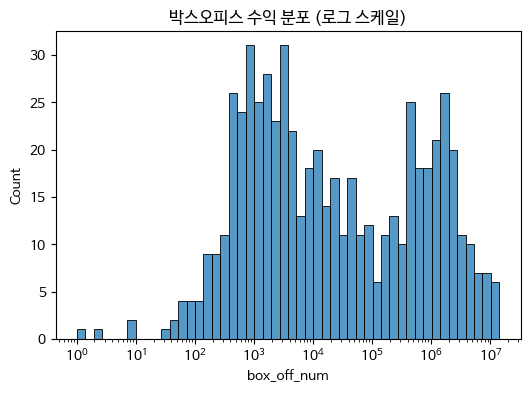

In [8]:
plt.figure(figsize=(6,4))
sns.histplot(train["box_off_num"], bins=50, log_scale=True)
plt.title("박스오피스 수익 분포 (로그 스케일)")
plt.show()
## 중간 부분(10^4, 10^5 구간)이 적고 양옆에 많이 분포해있는 게 좀 특이해 보인다.

**상영 시간과 박스오피스 수익의 관계: 사람들이 선호하는 상영 시간이 있을까?**

In [10]:
# time (상영시간) 분포파악
print(train['time'].describe())

count    600.000000
mean     100.863333
std       18.097528
min       45.000000
25%       89.000000
50%      100.000000
75%      114.000000
max      180.000000
Name: time, dtype: float64


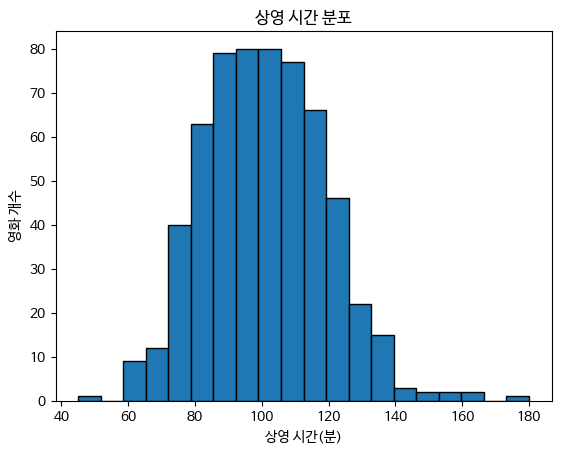

In [11]:
plt.hist(train['time'], bins=20, edgecolor='black')
plt.xlabel("상영 시간(분)")
plt.ylabel("영화 개수")
plt.title("상영 시간 분포")
plt.show()
## 대부분의 영화가 80분-120분 사이에 분포하고 있음.
## 150분 이상, 50분 이하는 매우 드물다. 이후에 이 부분들에 대한 분석을 진행하기에는 데이터 수가 너무 적을 것 같다.

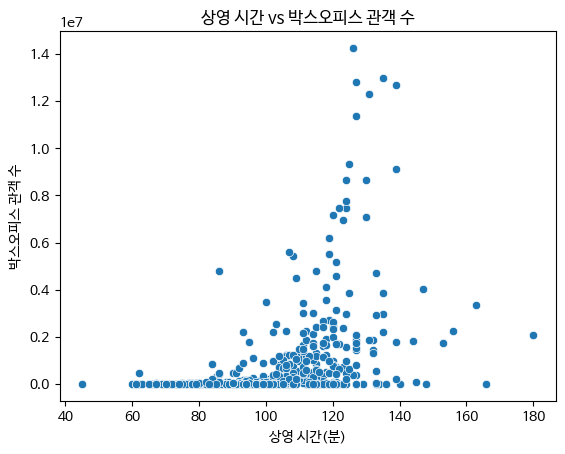

                 time  box_off_num
time         1.000000     0.441452
box_off_num  0.441452     1.000000


In [12]:
sns.scatterplot(x='time', y='box_off_num', data=train)
plt.xlabel("상영 시간(분)")
plt.ylabel("박스오피스 관객 수")
plt.title("상영 시간 vs 박스오피스 관객 수")
plt.show()

print(train[['time','box_off_num']].corr())
## 이후 분석을 진행할 때 구간을 나누어 평균 관객 수를 비교해보자.
## 너무 짧거나 긴 영화들은 데이터 수가 너무 적어 중간부분만 다시 그래프를 그리고 상관관계를 구해보면 명확해 질 것 같다.
## 상관계수가 0.44 정도로 어느 정도 의미 있는 수준이다.
## 상영 시간이 길수록 흥행하는 경향이 있긴 하다. 그러나 영화가 많이 길어지면 다시 줄어든다.
## 나중에 분석할 때는 다른 요인을 함께 넣어서 분석해보면 좋을 것 같다.


**스태프 수와 박스오피스 수의 관계 : 스태프의 수가 흥행에 영향을 줄까?**

In [15]:
#스태프 수 분포 확인
print(train['num_staff'].describe())

count    600.000000
mean     151.118333
std      165.654671
min        0.000000
25%       17.000000
50%       82.500000
75%      264.000000
max      869.000000
Name: num_staff, dtype: float64


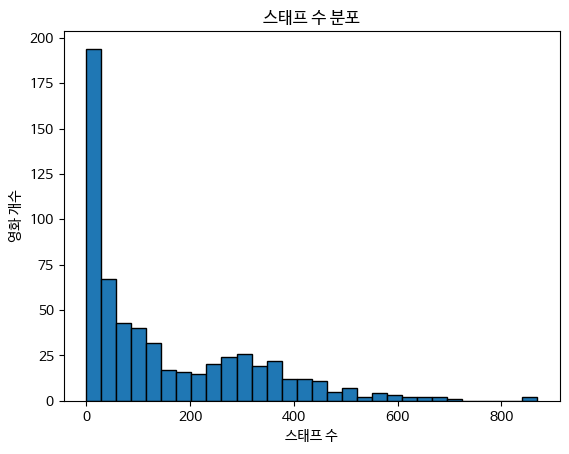

In [14]:
plt.hist(train['num_staff'], bins=30, edgecolor='black')
plt.xlabel("스태프 수")
plt.ylabel("영화 개수")
plt.title("스태프 수 분포")
plt.show()

## 대부분의 영화는 100명 이하의 스태프가 참여했다. 아주 일부는 800명이상 참여한 경우도 있다.
## 대규모 제작진을 투입한 영화는 소수이다.

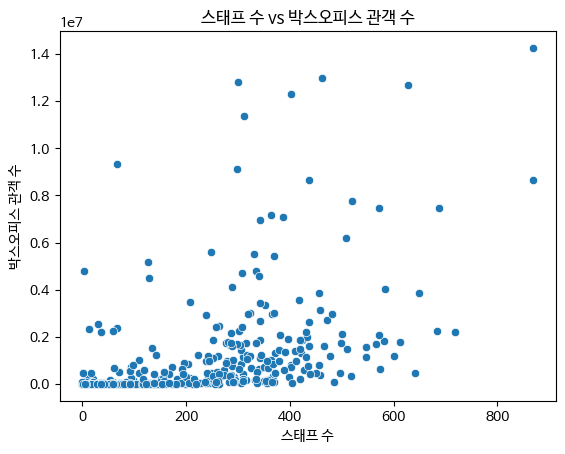

             num_staff  box_off_num
num_staff     1.000000     0.544265
box_off_num   0.544265     1.000000


In [16]:
sns.scatterplot(x='num_staff', y='box_off_num', data=train)
plt.xlabel("스태프 수")
plt.ylabel("박스오피스 관객 수")
plt.title("스태프 수 vs 박스오피스 관객 수")
plt.show()

print(train[['num_staff','box_off_num']].corr())

## 스태프수가 많을 수록 관객 수도 전반적으로 늘어나는 경향이 보인다.
## 상관계수는 0.54로 유의미한 양의 상관관계이다
## 스태프 수가 많을수록 흥행가능성이 높다는 것을 확인했다.
## 경향이 확실히 드러나도록 분석을 진행할때 특이값들을 제외하고 다시 그래프를 그려보면 좋을 것 같다. 아래에 지피티시켜서 살짝 해봣어요

staff_bin
~50명        7.211121e+04
51~100명     2.274235e+05
101~200명    2.564853e+05
201~400명    1.471359e+06
401~800명    2.709690e+06
800명~       1.146449e+07
Name: box_off_num, dtype: float64


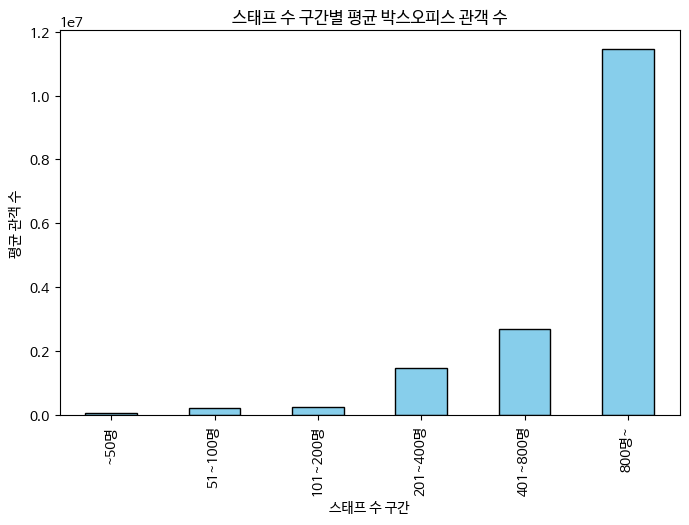

In [18]:
# 스태프 수 구간 나누기
train['staff_bin'] = pd.cut(train['num_staff'],
                            bins=[0,50,100,200,400,800,2000],
                            labels=['~50명','51~100명','101~200명','201~400명','401~800명','800명~'])

# 구간별 평균 관객 수 계산
staff_box = train.groupby('staff_bin')['box_off_num'].mean()
print(staff_box)

# 시각화
staff_box.plot(kind='bar', figsize=(8,5), color='skyblue', edgecolor='black')
plt.ylabel("평균 관객 수")
plt.xlabel("스태프 수 구간")
plt.title("스태프 수 구간별 평균 박스오피스 관객 수")
plt.show()

**상영 등급과 장르 : 상영 등급에 따른 장르의 차이가 있을까?**

In [19]:
print(train['screening_rat'].value_counts())
## 15세 이상, 청소년 관람불가 비중이크다.

screening_rat
청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: count, dtype: int64


In [20]:
print(train['genre'].value_counts())
## 드라마가 압도적으로 많다. 다음으로는 다큐, 멜로/로멘스...

genre
드라마       221
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
액션         28
느와르        27
애니메이션      21
미스터리       17
SF         13
뮤지컬         5
서스펜스        2
Name: count, dtype: int64


In [21]:
pd.crosstab(train['screening_rat'], train['genre'])
## 전체관람가의 경우 다큐가 매우 많다.
## 12세 관람가 : 드라마, 다큐멘터리
## 15세 : 드라마 등등 다양함
## 청소년 관람불가 : 다라마, 멜로 두드러짐, 느와르, 공포도 다른 등급에 비해 많다.

genre,SF,공포,느와르,다큐멘터리,드라마,멜로/로맨스,뮤지컬,미스터리,서스펜스,애니메이션,액션,코미디
screening_rat,,,,,,,,,,,,
12세 관람가,3,1,0,23,50,10,1,0,0,3,1,10
15세 관람가,6,19,9,17,76,21,0,9,0,1,16,28
전체 관람가,1,0,0,52,17,1,4,0,0,14,0,3
청소년 관람불가,3,22,18,1,78,46,0,8,2,3,11,12


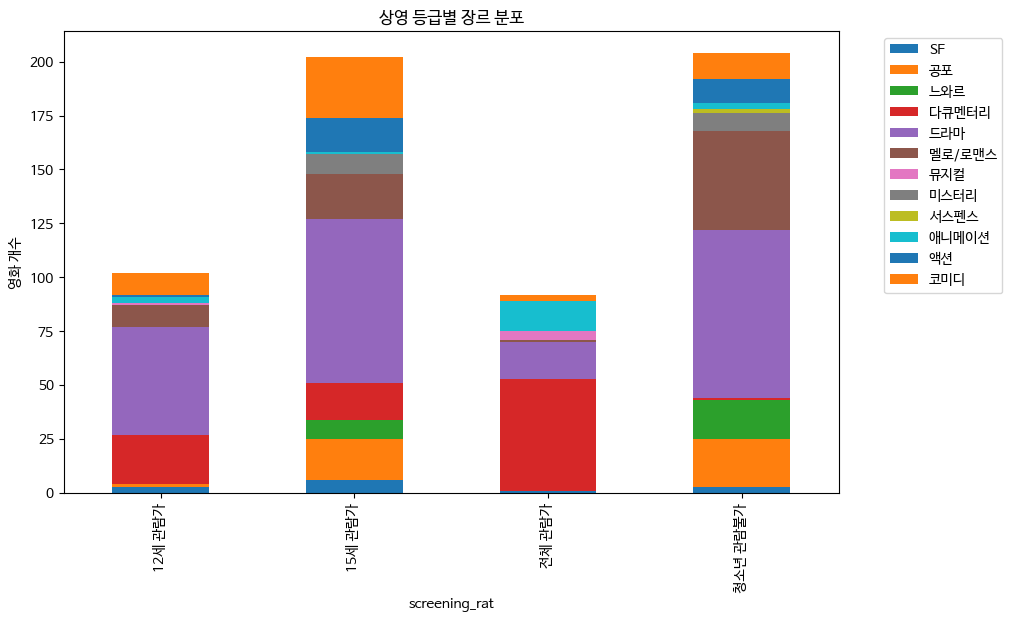

In [22]:
genre_by_rating = pd.crosstab(train['screening_rat'], train['genre'])

genre_by_rating.plot(kind='bar', stacked=True, figsize=(10,6))
plt.ylabel("영화 개수")
plt.title("상영 등급별 장르 분포")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
## 분포를 살펴봤을 때 드라마(보라색)이 눈에 띄게 많다.
## 하지만 전체관람가의 경우 애니메이션, 다큐멘터리 부분이 다른 등급에 비해 매우 크다.
## 느와르, sf의 경우 15세, 청불에는 보이지만 12세, 전체 관람가 에서는 거의 보이지 않는다.

## 영화 장르와 상영등급은 밀접한 관계가 있다는 것을 확인했다. 장르별 타깃 관객층이 존재하는 것같다.
## 이후 분석에서 등급별로 장르 분포를 비율로 변환해서 비교해보면 더 직관적 일 것 같다.

**이전 영화 수와 장르의 관계 : 감독의 경력에 따라 선호하는 장르가 있을까?**

In [24]:
print(train['dir_prev_num'].describe())
print(train['dir_prev_num'].value_counts().head(20))

count    600.000000
mean       0.876667
std        1.183409
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max        5.000000
Name: dir_prev_num, dtype: float64
dir_prev_num
0    330
1    113
2     86
3     47
4     20
5      4
Name: count, dtype: int64


In [37]:
train['career_bin'] = pd.cut(train['dir_prev_num'],
                             bins=[-1,0,2,6],
                             labels=['신인','초중급','중견'])
print(train['career_bin'].value_counts())
##신인 비중이 매우 크다.

career_bin
신인     330
초중급    199
중견      71
Name: count, dtype: int64


In [38]:
genre_by_career = pd.crosstab(train['career_bin'], train['genre'])
print(genre_by_career)

genre       SF  공포  느와르  다큐멘터리  드라마  멜로/로맨스  뮤지컬  미스터리  서스펜스  애니메이션  액션  코미디
career_bin                                                                  
신인           4  21    8     72  125      38    5     6     1     20   8   22
초중급          7  14   14     17   75      29    0     9     1      1   9   23
중견           2   7    5      4   21      11    0     2     0      0  11    8


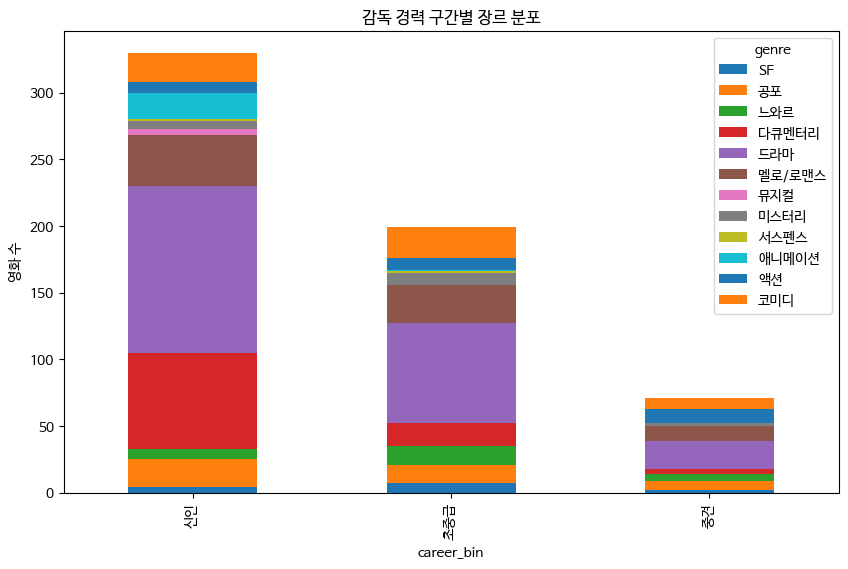

In [39]:
genre_by_career.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("감독 경력 구간별 장르 분포")
plt.ylabel("영화 수")
plt.show()

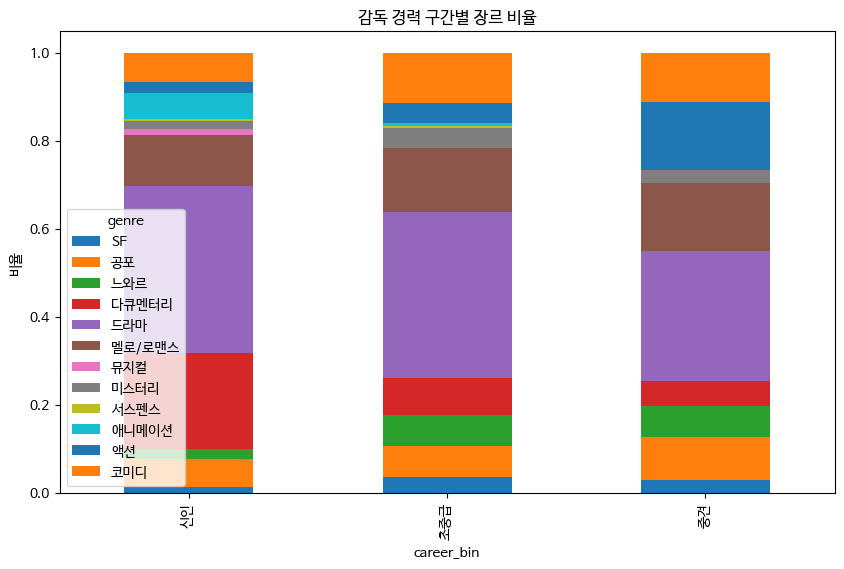

In [40]:
genre_by_career_ratio = genre_by_career.div(genre_by_career.sum(axis=1), axis=0)

genre_by_career_ratio.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("감독 경력 구간별 장르 비율")
plt.ylabel("비율")
plt.show()


신인감독 : 다큐멘터리, 드라마, 멜로 비중이 크다. 여기에서만 뮤지컬 장르가 보인다.

초중급 감독 : 다큐멘터리 비중이 눈에띄게 줄어 들었고 공포, 느와르, 액션 장르의 경우 늘어 난 것이 보인다.

중견감독 : 드라마, 멜로, 느와르 등등 다양하게 분포한다. 특히 SF가 눈에 띄게 늘었다.


**감독의 경력에 따라 선호 장르가 변화하는 경향이 분명히 드러난다.

**개봉일과 박스오피스 수익의 관계 : 사람들이 영화를 특히 많이 보는 기간이 있을까?**



In [41]:
train['release_time'] = pd.to_datetime(train['release_time'])
train['year'] = train['release_time'].dt.year
train['month'] = train['release_time'].dt.month
train['weekday'] = train['release_time'].dt.day_name()

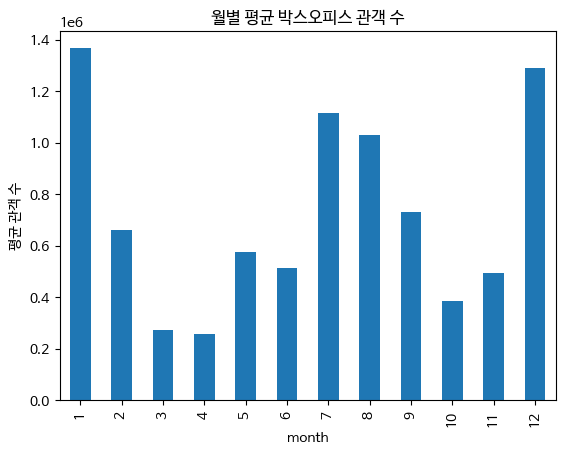

In [42]:
month_box = train.groupby('month')['box_off_num'].mean()
month_box.plot(kind='bar')
plt.ylabel("평균 관객 수")
plt.title("월별 평균 박스오피스 관객 수")
plt.show()
## 1, 7, 8, 12 월에 평균 관객 수가 확실히 높다. 방학, 연말 연휴 등 영화성수기와 일치한다.

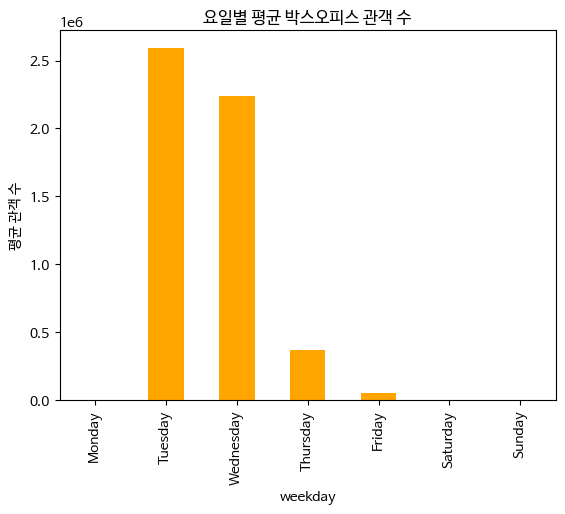

In [43]:
weekday_box = train.groupby('weekday')['box_off_num'].mean()
weekday_box = weekday_box.reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)

weekday_box.plot(kind='bar', color='orange')
plt.ylabel("평균 관객 수")
plt.title("요일별 평균 박스오피스 관객 수")
plt.show()

## 화요일, 수요일 개봉 영화의 평균 관객수가 매우 높다. 이 원인에 대해서 분석해보면 좋을 것같다.

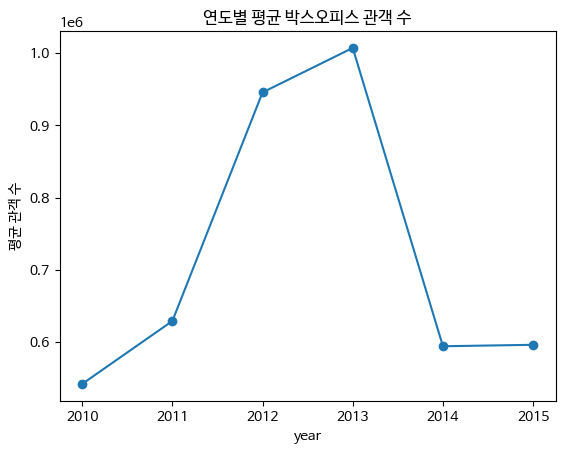

In [44]:
year_box = train.groupby('year')['box_off_num'].mean()
year_box.plot(marker='o')
plt.ylabel("평균 관객 수")
plt.title("연도별 평균 박스오피스 관객 수")
plt.show()

## 2010년 초반부터 상승하다가 2012-2013년에 정점, 이후 다시 하락한다.